<h1>Safal Shrestha</h1>

In [1]:
#import required python packages such as pandas, seaborn, matplotlib 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

<h2>Descriptive Analysi</h2>

<b>Load the Dataset</b>

In [2]:
# load the dataset using read_csv function 
data = pd.read_csv("datasets/cooking_fuel.csv")

In [6]:
data.head(5) # see the first five dataset 

,District,Province,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others
0,Taplejung,Koshi,24630,3006,32,5,51,21,31
1,Sankhuwasabha,Koshi,32922,5907,61,3,171,41,13
2,Solukhumbu,Koshi,21785,3945,400,1,56,51,1
3,Okhaldhunga,Koshi,31285,2724,21,3,216,23,14
4,Khotang,Koshi,38030,3351,43,4,241,42,9


In [7]:
# check the dataset has non-null values or not 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   District     77 non-null     object
 1   Province     77 non-null     object
 2   Wood         77 non-null     int64 
 3   Gas          77 non-null     int64 
 4   Electricity  77 non-null     int64 
 5   Cowdung      77 non-null     int64 
 6   Biogas       77 non-null     int64 
 7   Kerosene     77 non-null     int64 
 8   Others       77 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 5.5+ KB


In [8]:
# check for the duplicates 
data[data.duplicated()]

,District,Province,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others


In [138]:
data.shape # total number of rows and columns

(77, 10)

In [140]:
data.size # total number of elements in the dataset

770

In [12]:
# describe the dataset which gives  count, mean, quartiles, mode, min, max,std 
data.describe()

,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,44133.974026,38311.623377,423.038961,2487.415584,1018.259740,42.818182,87.298701
std,24887.927232,69901.356684,696.420178,7167.881015,1891.960543,35.592994,195.011677
min,1058.000000,133.000000,1.000000,0.000000,14.000000,1.000000,1.000000
25%,25782.000000,3688.000000,30.000000,2.000000,120.000000,21.000000,11.000000
50%,42743.000000,13830.000000,91.000000,9.000000,325.000000,33.000000,23.000000
75%,57020.000000,46036.000000,717.000000,113.000000,939.000000,51.000000,52.000000
max,109720.000000,526931.000000,4694.000000,44715.000000,11902.000000,175.000000,1439.000000


In [94]:
# calculate the central tendency 
# mean, median and mode 
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only= True)
mode_values = data.mode(numeric_only=True).iloc[0]

In [14]:
mean_values

Wood           44133.974026
Gas            38311.623377
Electricity      423.038961
Cowdung         2487.415584
Biogas          1018.259740
Kerosene          42.818182
Others            87.298701
dtype: float64

In [15]:
median_values

Wood           42743.0
Gas            13830.0
Electricity       91.0
Cowdung            9.0
Biogas           325.0
Kerosene          33.0
Others            23.0
dtype: float64

In [95]:
mode_values

Wood           1058.0
Gas             133.0
Electricity      36.0
Cowdung           0.0
Biogas           30.0
Kerosene         12.0
Others           10.0
Name: 0, dtype: float64

In [17]:
data.columns

Index(['District', 'Province', 'Wood', 'Gas', 'Electricity', 'Cowdung',
       'Biogas', 'Kerosene', 'Others'],
      dtype='object')

In [21]:
# cooking fules used 
cooking_fules = ['Wood','Gas','Electricity','Cowdung','Biogas','Kerosene','Others'] 

In [23]:
total_houses = {}

In [25]:
for fule in cooking_fules:
    total_houses[fule]= data[fule].sum()

In [119]:
total_houses

{'Wood': 3398316,
 'Gas': 2949995,
 'Electricity': 32574,
 'Cowdung': 191531,
 'Biogas': 78406,
 'Kerosene': 3297,
 'Others': 6722}

In [135]:
# district with the highest and lowest number of households
data['dis_total'] = data[cooking_fules].sum(axis=1)
print(data.min())
print(data.max())

District        Achham
Province       Bagmati
Wood              1058
Gas                133
Electricity          1
Cowdung              0
Biogas              14
Kerosene             1
Others               1
dis_total         1547
dtype: object
District           Udayapur
Province       SudurPaschim
Wood                 109720
Gas                  526931
Electricity            4694
Cowdung               44715
Biogas                11902
Kerosene                175
Others                 1439
dis_total            542892
dtype: object


In [129]:
# highest and lowest number of households using each type of cooking fuel
data.value_counts()

District     Province      Wood   Gas    Electricity  Cowdung  Biogas  Kerosene  Others
Achham       SudurPaschim  46350  2928   34           1        140     76        38        1
Okhaldhunga  Koshi         31285  2724   21           3        216     23        14        1
Rasuwa       Bagmati       7565   3517   17           0        25      3         4         1
Ramechhap    Bagmati       40650  5555   40           3        171     37        10        1
Pyuthan      Lumbini       49844  6102   68           8        126     33        14        1
                                                                                          ..
Ilam         Koshi         55179  14225  144          8        883     21        41        1
Humla        Karnali       11035  133    8            0        14      8         6         1
Gulmi        Lumbini       57020  8695   47           7        280     38        13        1
Gorkha       Gandaki       45813  24460  126          31       1137    133 

<h2>Diagnostic Analysis</h2>

In [58]:
# group the data by Province 
group_by_province=  data.groupby('Province').sum()


In [49]:
provinces = data['Province'].unique() # get all the proviences 

In [116]:
group_by_province['total'] = group_by_province[cooking_fules].sum(axis=1)
# group_by_province.sum(axis=0)

In [143]:
#display the total usages of fule in each province 
group_by_province

,District,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others,total
Province,,,,,,,,,
Bagmati,DolakhaSindhupalchokRasuwaDhadingNuwakotKathma...,453987,1094195,8887,185,9342,755,566,1567917
Gandaki,GorkhaManangMustangMyagdiKaskiLamjungTanahuNaw...,311925,341017,1390,225,6548,315,212,661632
Karnali,DolpaMuguHumlaJumlaKalikotDailekhJajarkotRukum...,300962,61727,353,510,1623,648,214,366037
Koshi,TaplejungSankhuwasabhaSolukhumbuOkhaldhungaKho...,635672,490297,6177,40207,15682,468,2252,1190755
Lumbini,Rukum_EastRolpaPyuthanGulmiArghakhanchiPalpaNa...,612698,481748,4692,23686,17230,574,717,1141345
Madhesh,SaptariSirahaDhanusaMahottariSarlahiRautahatBa...,677732,331992,9468,126273,8252,303,2363,1156383
SudurPaschim,BajuraBajhangDarchulaBaitadiDadeldhuraDotiAchh...,405340,149019,1607,445,19729,234,398,576772


In [159]:
# commonly used and least used fules in each province 
group_by_province[cooking_fules]

,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others
Province,,,,,,,
Bagmati,453987,1094195,8887,185,9342,755,566
Gandaki,311925,341017,1390,225,6548,315,212
Karnali,300962,61727,353,510,1623,648,214
Koshi,635672,490297,6177,40207,15682,468,2252
Lumbini,612698,481748,4692,23686,17230,574,717
Madhesh,677732,331992,9468,126273,8252,303,2363
SudurPaschim,405340,149019,1607,445,19729,234,398


In [70]:
# Compute the correlation 
correlation = data.corr(numeric_only=True) 

In [71]:
correlation

,Wood,Gas,Electricity,Cowdung,Biogas,Kerosene,Others
Wood,1.000000,0.095643,0.351625,0.535028,0.535588,0.139832,0.585203
Gas,0.095643,1.000000,0.869487,0.130590,0.295369,0.318719,0.368057
Electricity,0.351625,0.869487,1.000000,0.400405,0.327468,0.263162,0.531395
Cowdung,0.535028,0.130590,0.400405,1.000000,0.095256,-0.091170,0.535855
Biogas,0.535588,0.295369,0.327468,0.095256,1.000000,-0.036218,0.368867
Kerosene,0.139832,0.318719,0.263162,-0.091170,-0.036218,1.000000,0.041261
Others,0.585203,0.368057,0.531395,0.535855,0.368867,0.041261,1.000000


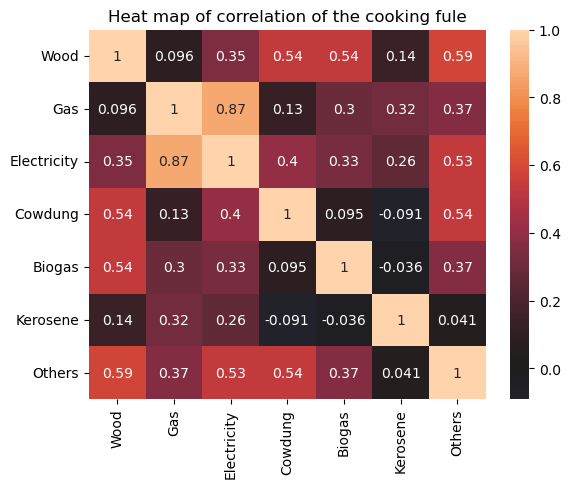

In [78]:
# heat map for the correlation 
sns.heatmap(correlation,annot=True,center=0)
plt.title("Heat map of correlation of the cooking fule")
plt.show()

<h2> Data Visualization</h2>

<Figure size 1000x1000 with 0 Axes>

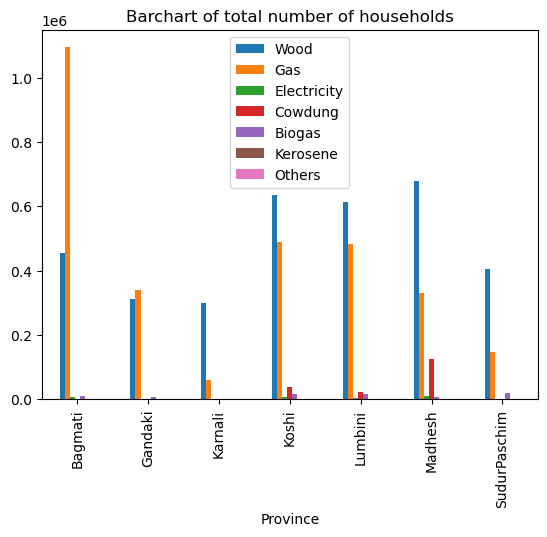

In [142]:
# Barchart 
plt.figure(figsize = (10,10))
group_by_province[cooking_fules].plot(kind='bar')
plt.title("Barchart of total number of households")
plt.show()

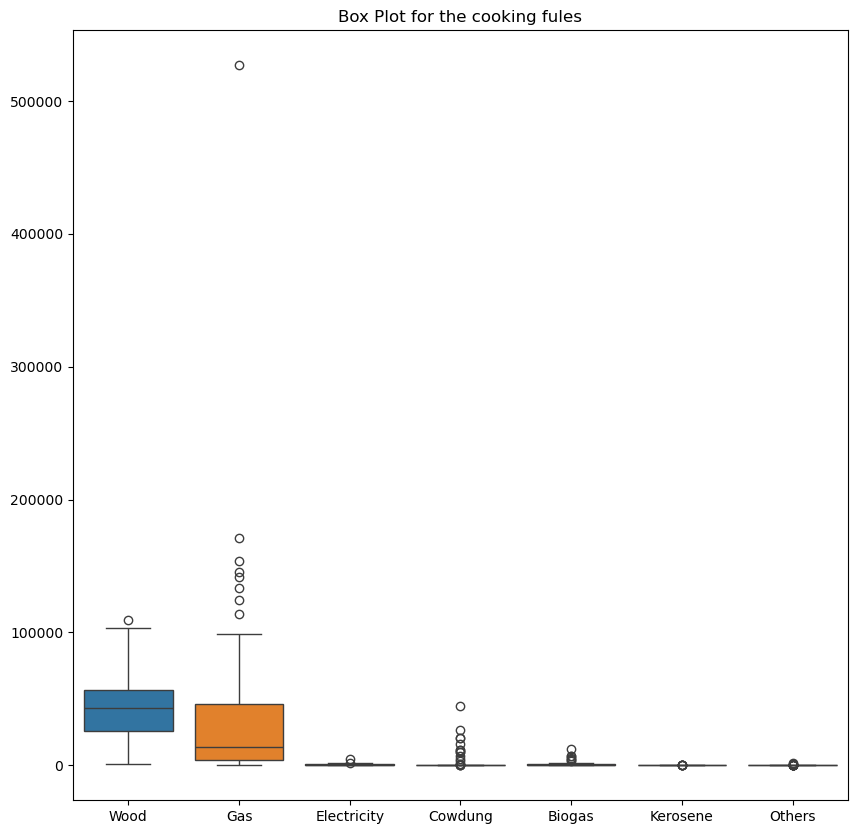

In [91]:
plt.figure(figsize = (10,10))
sns.boxplot(data)
plt.title("Box Plot for the cooking fules")
plt.show()